# **IBM CAPSTONE PROJECT**

# Locating a Spanish Academy in Madrid, Spain for foreigners

## **Introduction** 

The problem attempted to solve in this project is the optimal location for a Spanish as a Second Language Academy in Madrid, Spain. In order to do so an analytical approach will be used with advanced machine learning, using clustering to solve the problem.
Madrid is the capital of Spain and as such it is a multicultural city where thousands of people come from all over the world to live and do business and also to study Spanish and learn about the culture.

### 0. Import Libraries

In [1]:
pip install geopy

     |████████████████████████████████| 122kB 21.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install bs4

     |████████████████████████████████| 122kB 22.1MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [4]:
data = pd.read_excel('C4210618.xls', sheet_name = 'C4210618', skiprows = 12)

In [5]:
data.drop(columns = ['Unnamed: 0'], inplace = True)
data.columns = ['Country of Procedence', 'Total Ciudad de Madrid', 'Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartin',
                'Tetuán', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Latina', 'Carabanchel',
                'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
                'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas', 'Barajas']
data.to_csv('Madrid Neighborhoods.csv')
data.head(25)

,Country of Procedence,Total Ciudad de Madrid,Centro,Arganzuela,Retiro,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas
0,Rumanía,45036.0,815.0,754.0,480.0,753.0,680.0,1468.0,597.0,1830.0,991.0,4904.0,5873.0,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0
1,China,37276.0,1508.0,1356.0,564.0,755.0,652.0,1988.0,816.0,1733.0,960.0,2554.0,4398.0,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0
2,Ecuador,23953.0,647.0,741.0,265.0,619.0,380.0,1395.0,453.0,632.0,387.0,2194.0,3674.0,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0
3,Venezuela,23359.0,1563.0,913.0,638.0,1564.0,933.0,1310.0,794.0,1428.0,630.0,1448.0,1870.0,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0
4,Colombia,22618.0,998.0,717.0,483.0,803.0,551.0,822.0,659.0,999.0,454.0,1786.0,3395.0,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0
5,Marruecos,21909.0,1101.0,390.0,184.0,322.0,280.0,1393.0,320.0,930.0,342.0,1539.0,2223.0,942.0,3437.0,258.0,1011.0,426.0,3372.0,1655.0,802.0,649.0,333.0
6,Italia,20308.0,3030.0,1219.0,840.0,1817.0,1060.0,1194.0,1640.0,1195.0,710.0,826.0,915.0,412.0,704.0,310.0,1258.0,1109.0,330.0,427.0,189.0,786.0,337.0
7,Perú,18829.0,563.0,521.0,253.0,612.0,419.0,965.0,567.0,805.0,368.0,2026.0,2425.0,1131.0,2079.0,668.0,1726.0,603.0,1280.0,564.0,338.0,810.0,106.0
8,Paraguay,18682.0,364.0,474.0,237.0,521.0,657.0,3311.0,584.0,1024.0,636.0,2061.0,2152.0,727.0,1354.0,360.0,1619.0,583.0,870.0,217.0,199.0,581.0,151.0
9,República Dominicana,17511.0,365.0,654.0,204.0,344.0,322.0,2272.0,443.0,589.0,536.0,1501.0,1607.0,1202.0,1989.0,223.0,1581.0,359.0,1881.0,296.0,151.0,889.0,103.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country of Procedence   37 non-null     object 
 1   Total Ciudad de Madrid  34 non-null     float64
 2   Centro                  34 non-null     float64
 3   Arganzuela              34 non-null     float64
 4   Retiro                  34 non-null     float64
 5   Salamanca               34 non-null     float64
 6   Chamartin               34 non-null     float64
 7   Tetuán                  34 non-null     float64
 8   Chamberí                34 non-null     float64
 9   Fuencarral-El Pardo     34 non-null     float64
 10  Moncloa-Aravaca         34 non-null     float64
 11  Latina                  34 non-null     float64
 12  Carabanchel             34 non-null     float64
 13  Usera                   34 non-null     float64
 14  Puente de Vallecas      34 non-null     floa

In [7]:
data.isnull().sum()

Country of Procedence     2
Total Ciudad de Madrid    5
Centro                    5
Arganzuela                5
Retiro                    5
Salamanca                 5
Chamartin                 5
Tetuán                    5
Chamberí                  5
Fuencarral-El Pardo       5
Moncloa-Aravaca           5
Latina                    5
Carabanchel               5
Usera                     5
Puente de Vallecas        5
Moratalaz                 5
Ciudad Lineal             5
Hortaleza                 5
Villaverde                5
Villa de Vallecas         5
Vicálvaro                 5
San Blas-Canillejas       5
Barajas                   5
dtype: int64

In [8]:
data.fillna(method = 'ffill', inplace = True)
data.fillna(method = 'bfill', inplace = True)

## Creating df with Madrid's Neighbourhhoods and coordinates

In [9]:
coord_df = pd.DataFrame( data = {

'Neighborhood' : ['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartin',
                'Tetuán', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Latina', 'Carabanchel',
                'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
                'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas', 'Barajas'],
'Latitude' : ['40.415347', '40.402733', '40.408072', '40.43', '40.453333', '40.460556', '40.432792', '40.478611', '40.435151',
                 '40.402461', '40.383669', '40.381336', '40.398204', '40.409869', '40.45', '40.469457', '40.345925', '40.3796', 
                 '40.4042', '40.426001', '40.470196'],
'Longitude' : ['-3.707371', '-3.695403', '-3.676729', '-3.677778', '-3.6775', '-3.7', '-3.697186', '-3.709722', '-3.718765', 
                  '-3.741294', '-3.727989', '-3.706856', '-3.669059', '-3.644436', '-3.65', '-3.640482', '-3.709356', '-3.62135', 
                  '-3.60806', '-3.612764', '-3.58489']})

In [10]:
coord_df.head()

,Neighborhood,Latitude,Longitude
0,Centro,40.415347,-3.707371
1,Arganzuela,40.402733,-3.695403
2,Retiro,40.408072,-3.676729
3,Salamanca,40.43,-3.677778
4,Chamartin,40.453333,-3.6775


In [11]:
coord_df.info

<bound method DataFrame.info of            Neighborhood   Latitude  Longitude
0                Centro  40.415347  -3.707371
1            Arganzuela  40.402733  -3.695403
2                Retiro  40.408072  -3.676729
3             Salamanca      40.43  -3.677778
4             Chamartin  40.453333    -3.6775
5                Tetuán  40.460556       -3.7
6              Chamberí  40.432792  -3.697186
7   Fuencarral-El Pardo  40.478611  -3.709722
8       Moncloa-Aravaca  40.435151  -3.718765
9                Latina  40.402461  -3.741294
10          Carabanchel  40.383669  -3.727989
11                Usera  40.381336  -3.706856
12   Puente de Vallecas  40.398204  -3.669059
13            Moratalaz  40.409869  -3.644436
14        Ciudad Lineal      40.45      -3.65
15            Hortaleza  40.469457  -3.640482
16           Villaverde  40.345925  -3.709356
17    Villa de Vallecas    40.3796   -3.62135
18            Vicálvaro    40.4042   -3.60806
19  San Blas-Canillejas  40.426001  -3.612764
20

In [13]:
#Change the type of the Latitude and ongitude values to float 

coord_df['Latitude'] = coord_df['Latitude'].astype('float', errors = 'ignore')
coord_df['Longitude'] = coord_df['Longitude'].astype('float', errors = 'ignore')
coord_df.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [14]:
#using Forsquare API get the latitudes and longitdes of Madrid 
address = 'Madrid, Madrid'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Madrid are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


The geograpical coordinates of Madrid are 40.4167047, -3.7035825.


In [15]:
Madrid_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(coord_df['Latitude'], coord_df['Longitude'], coord_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Madrid_map)  
    
Madrid_map

Use forsquare data to explore the neighbourhood

In [16]:
CLIENT_ID = 'OHHEZ3EGRWAO4PT3HQAJLMSK30P5SVINY5GEJIQTDGUQ3VKS' # Foursquare ID
CLIENT_SECRET = 'SRWZJ1VBUO1FXGZUGLV4WENO0P3WRDWFBR3VUDC3410EYY40' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: OHHEZ3EGRWAO4PT3HQAJLMSK30P5SVINY5GEJIQTDGUQ3VKS
CLIENT_SECRET:SRWZJ1VBUO1FXGZUGLV4WENO0P3WRDWFBR3VUDC3410EYY40


In [17]:
#Obtain the first neighbourhood, the most relevant one: 

neighborhood_latitude = coord_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = coord_df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = coord_df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Centro are 40.415347, -3.707371.


In [18]:
#get top 100 veues in Rouge in a 500m radius 

LIMIT=100 
radius= 500 
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [19]:
results= requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eceeb7177af03001bbc2675'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Plaza Mayor',
  'headerFullLocation': 'Plaza Mayor, Madrid',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 76,
  'suggestedBounds': {'ne': {'lat': 40.4198470045, 'lng': -3.701471589889844},
   'sw': {'lat': 40.410846995499995, 'lng': -3.7132704101101566}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5108e3d129a6465f856837dc',
       'name': 'La Taberna de Mister Pinkleton',
       'location': {'address': 'Cuchilleros, 7',
        'lat': 40.414535529593635,
        'lng': -3.708108373041791,
        'labeledLatLngs': [{'label': 'display',
          

In [20]:
#create a function to extract the category of the venues 

def get_category_type(row):
    try: 
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']        

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,La Taberna de Mister Pinkleton,Other Nightlife,40.414536,-3.708108
1,The Hat Madrid,Hotel,40.414343,-3.707120
2,Plaza Mayor,Plaza,40.415527,-3.707506
3,Plaza Menor,Lounge,40.414192,-3.708494
4,Bodegas Ricla,Wine Bar,40.414266,-3.708077


In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

76 venues were returned by Foursquare.


In [23]:
#create a function that repeats the process for all the neighbourhoods in Madrid. 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
Madrid_venues = getNearbyVenues(names= coord_df['Neighborhood'],
                                   latitudes= coord_df['Latitude'],
                                   longitudes= coord_df['Longitude']
                                  )

Centro
Arganzuela
Retiro
Salamanca
Chamartin
Tetuán
Chamberí
Fuencarral-El Pardo
Moncloa-Aravaca
Latina
Carabanchel
Usera
Puente de Vallecas
Moratalaz
Ciudad Lineal
Hortaleza
Villaverde
Villa de Vallecas
Vicálvaro
San Blas-Canillejas
Barajas


In [26]:
#checking the sie of the new dataframe 
print(Madrid_venues.shape)
Madrid_venues.head()

(698, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centro,40.415347,-3.707371,La Taberna de Mister Pinkleton,40.414536,-3.708108,Other Nightlife
1,Centro,40.415347,-3.707371,The Hat Madrid,40.414343,-3.707120,Hotel
2,Centro,40.415347,-3.707371,Plaza Mayor,40.415527,-3.707506,Plaza
3,Centro,40.415347,-3.707371,Plaza Menor,40.414192,-3.708494,Lounge
4,Centro,40.415347,-3.707371,Bodegas Ricla,40.414266,-3.708077,Wine Bar


In [27]:
#Obtain the number of venues by neighbourhood 
Madrid_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arganzuela,85,85,85,85,85,85
Barajas,29,29,29,29,29,29
Carabanchel,9,9,9,9,9,9
Centro,76,76,76,76,76,76
Chamartin,53,53,53,53,53,53
Chamberí,100,100,100,100,100,100
Ciudad Lineal,24,24,24,24,24,24
Fuencarral-El Pardo,38,38,38,38,38,38
Hortaleza,18,18,18,18,18,18


In [28]:
#Analything the neighbourhoods for their types of venues 
# one hot encoding
madrid_onehot = pd.get_dummies(Madrid_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
madrid_onehot['Neighborhood'] = Madrid_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]
#madrid_onehot = madrid_onehot[['Neighborhood',
madrid_onehot.head()

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Cafeteria,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food & Drink Shop,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nightclub,Noodle House,Opera House,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paella Restaurant,Park,Pastry Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Plaza,Polish Restaurant,Pub,Ramen Restaurant,Resort,Restaurant,Road,Salad Place,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trade School,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
#grouping each neighbourhood and obtainign the mean ocurrance of each category 
madrid_grouped = madrid_onehot.groupby('Neighborhood').mean().reset_index()
madrid_grouped

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Cafeteria,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food & Drink Shop,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nightclub,Noodle House,Opera House,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paella Restaurant,Park,Pastry Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Plaza,Polish Restaurant,Pub,Ramen Restaurant,Resort,Restaurant,Road,Salad Place,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trade School,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,Arganzuela,0.000000,0.023529,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.00,0.047059,0.000000,0.011765,0.023529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023529,0.023529,0.000000,0.023529,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.011765,0.000000,0.000000,0.011765,0.000000,0.011765,0.000000,0.011765,0.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.023529,0.011765,0.000000,0.000000,0.011765,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.070588,0.011765,0.035294,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.023529,0.000000,0.000000,0.000000,0.011765,0.011765,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.000000,0.023529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.011765,0.011765,0.000000,0.000000,0.000000,0.011765,0.000000,0.011765,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.011765,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.011765,0.023529,0.000000,0.011765,0.000000,0.000000,0.011765,0.000000,0.00,0.00,0.094118,0.000000,0.000000,0.000000,0.000000,0.047059,0.011765,0.00,0.011765,0.000000,0.011765,0.000000,0.011765,0.011765,0.000000,0.011765,0.00,0.000000,0.000000,0.000000
1,Barajas,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.034483,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [30]:
#top 5 venues by neighborhood 
num_top_venues = 5

for hood in madrid_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = madrid_grouped[madrid_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arganzuela----
                venue  freq
0          Restaurant  0.12
1  Spanish Restaurant  0.09
2       Grocery Store  0.07
3              Bakery  0.05
4    Tapas Restaurant  0.05


----Barajas----
                venue  freq
0               Hotel  0.21
1          Restaurant  0.14
2  Spanish Restaurant  0.10
3         Coffee Shop  0.07
4    Tapas Restaurant  0.07


----Carabanchel----
              venue  freq
0             Plaza  0.11
1       Pizza Place  0.11
2      Soccer Field  0.11
3         Nightclub  0.11
4  Tapas Restaurant  0.11


----Centro----
                venue  freq
0    Tapas Restaurant  0.13
1               Plaza  0.13
2  Spanish Restaurant  0.09
3              Hostel  0.08
4        Cocktail Bar  0.04


----Chamartin----
                venue  freq
0          Restaurant  0.15
1  Spanish Restaurant  0.13
2              Bakery  0.06
3       Grocery Store  0.06
4    Tapas Restaurant  0.06


----Chamberí----
                venue  freq
0  Spanish Restaurant  0.12
1

In [31]:
#sort venues in descending order 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
#create a new df and show top ten venues 

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = madrid_grouped['Neighborhood']

for ind in np.arange(madrid_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arganzuela,Restaurant,Spanish Restaurant,Grocery Store,Tapas Restaurant,Bakery,Gym / Fitness Center,Sandwich Place,Breakfast Spot,Brewery,Beer Garden
1,Barajas,Hotel,Restaurant,Spanish Restaurant,Tapas Restaurant,Coffee Shop,Bar,Brewery,Fast Food Restaurant,Bistro,Japanese Restaurant
2,Carabanchel,Soccer Field,Tapas Restaurant,Pizza Place,Burger Joint,Plaza,Fast Food Restaurant,Bakery,Metro Station,Nightclub,Food & Drink Shop
3,Centro,Tapas Restaurant,Plaza,Spanish Restaurant,Hostel,Bistro,Cocktail Bar,Wine Bar,Restaurant,Bar,Market
4,Chamartin,Restaurant,Spanish Restaurant,Tapas Restaurant,Bakery,Grocery Store,Park,Coffee Shop,Pizza Place,Gastropub,Japanese Restaurant
5,Chamberí,Spanish Restaurant,Restaurant,Brewery,Bar,Café,Italian Restaurant,Japanese Restaurant,Plaza,Mexican Restaurant,Tapas Restaurant
6,Ciudad Lineal,Spanish Restaurant,Gastropub,Supermarket,Argentinian Restaurant,Restaurant,Burger Joint,Bakery,Tapas Restaurant,Café,Pizza Place
7,Fuencarral-El Pardo,Clothing Store,Italian Restaurant,Fast Food Restaurant,Restaurant,Tapas Restaurant,Burger Joint,Boutique,Shopping Mall,Kebab Restaurant,Sandwich Place
8,Hortaleza,Breakfast Spot,Pizza Place,Supermarket,Argentinian Restaurant,Cafeteria,Donut Shop,Pharmacy,Chinese Restaurant,Sandwich Place,Clothing Store
9,Latina,Pizza Place,Train Station,Fast Food Restaurant,Falafel Restaurant,Grocery Store,Asian Restaurant,Bakery,Park,Metro Station,Donut Shop


## **Clustering** 

In [33]:
#obtain the clustering by neighbourhoods 
madrid_grouped_clustering = madrid_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1, 22)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(madrid_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

In [34]:
#plot and visualiza teh optimal K 
optimal_k= pd.DataFrame(data= Sum_of_squared_distances, columns = ['Sum_of_squared_distances'], index = K)
optimal_k.rename_axis('K', axis = 'columns', inplace = True)
#optimal_k

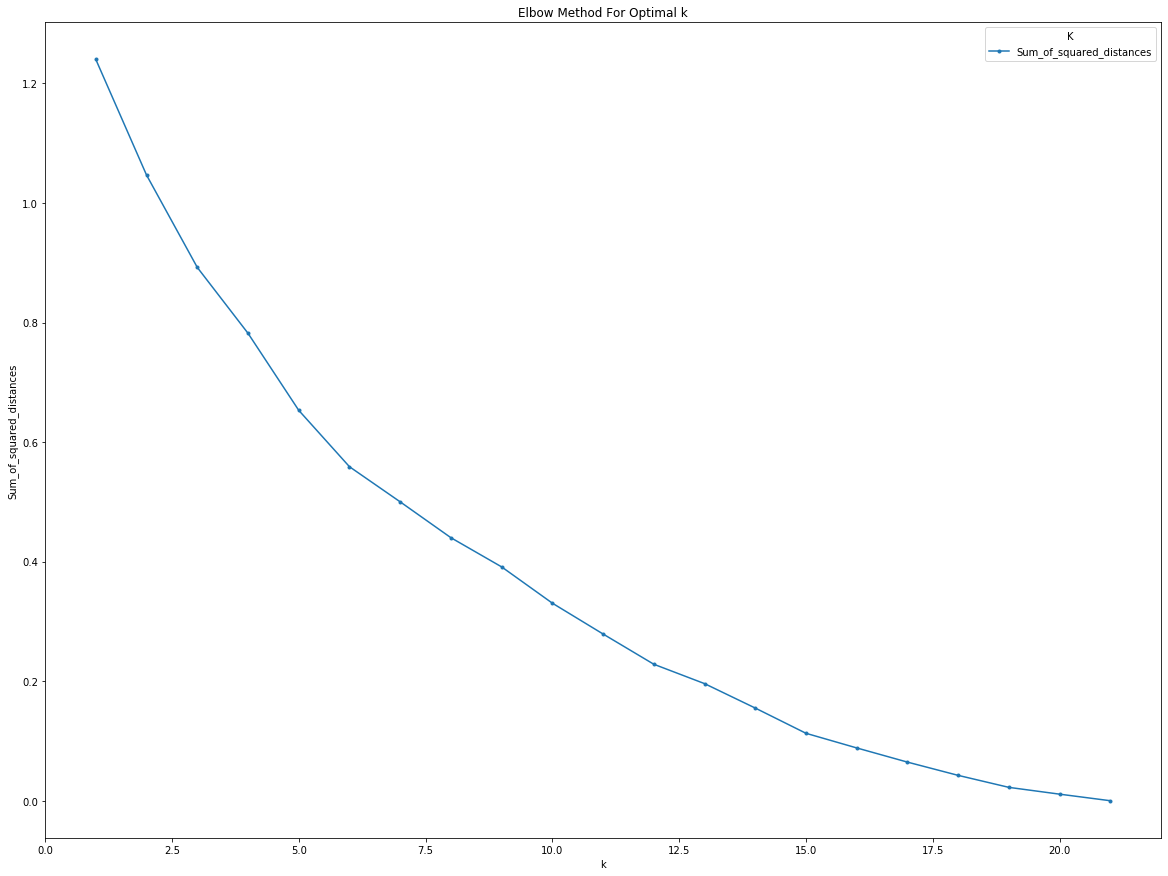

In [36]:
optimal_k.plot(kind = 'line', figsize = (20, 15), marker = '.')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As it can be seen on the graph, k=5 is the optimal value of K as it is a little higher and off trend than the rest of the values. 

In [51]:
#Setting clustering values 



# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]



array([4, 4, 3, 4, 4, 4, 0, 4, 4, 1], dtype=int32)

In [52]:
#remove rows in the origial df for which the Forusquare call didn't return values 

data['Neighborhood'] = neighborhoods_venues_sorted['Neighborhood']
print(data.shape)
data.isnull().sum()
data.dropna(how = 'any', axis = 0, inplace = True)
print(data.shape)
print(neighborhoods_venues_sorted.shape)

(21, 25)
(21, 25)
(21, 11)


## Segmenting Neighborhoods by population nationalities and most common venues 

In [53]:
madrid_merged = data

# add clustering labels
madrid_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
madrid_merged = madrid_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
madrid_merged[['Latitude', 'Longitude']] = coord_df[['Latitude', 'Longitude']]
madrid_merged['Latitude'] = madrid_merged['Latitude'].astype(float)
madrid_merged['Longitude'] = madrid_merged['Longitude'].astype(float)
print(madrid_merged.shape)
madrid_merged.head() # check the last columns!

(21, 37)


,Country of Procedence,Total Ciudad de Madrid,Centro,Arganzuela,Retiro,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,Rumanía,45036.0,815.0,754.0,480.0,753.0,680.0,1468.0,597.0,1830.0,991.0,4904.0,5873.0,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0,Arganzuela,4,Restaurant,Spanish Restaurant,Grocery Store,Tapas Restaurant,Bakery,Gym / Fitness Center,Sandwich Place,Breakfast Spot,Brewery,Beer Garden,40.415347,-3.707371
1,China,37276.0,1508.0,1356.0,564.0,755.0,652.0,1988.0,816.0,1733.0,960.0,2554.0,4398.0,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0,Barajas,4,Hotel,Restaurant,Spanish Restaurant,Tapas Restaurant,Coffee Shop,Bar,Brewery,Fast Food Restaurant,Bistro,Japanese Restaurant,40.402733,-3.695403
2,Ecuador,23953.0,647.0,741.0,265.0,619.0,380.0,1395.0,453.0,632.0,387.0,2194.0,3674.0,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0,Carabanchel,3,Soccer Field,Tapas Restaurant,Pizza Place,Burger Joint,Plaza,Fast Food Restaurant,Bakery,Metro Station,Nightclub,Food & Drink Shop,40.408072,-3.676729
3,Venezuela,23359.0,1563.0,913.0,638.0,1564.0,933.0,1310.0,794.0,1428.0,630.0,1448.0,1870.0,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0,Centro,4,Tapas Restaurant,Plaza,Spanish Restaurant,Hostel,Bistro,Cocktail Bar,Wine Bar,Restaurant,Bar,Market,40.430000,-3.677778
4,Colombia,22618.0,998.0,717.0,483.0,803.0,551.0,822.0,659.0,999.0,454.0,1786.0,3395.0,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0,Chamartin,4,Restaurant,Spanish Restaurant,Tapas Restaurant,Bakery,Grocery Store,Park,Coffee Shop,Pizza Place,Gastropub,Japanese Restaurant,40.453333,-3.677500


**Clustering visualization** 

In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Neighborhood'], madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Cluster examination 

### **CLUSTER 1**

In [42]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 0, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
19,Reino Unido,550.0,466.0,329.0,501.0,313.0,304.0,211.0,170.0,81.0,142.0,59.0,285.0,319.0,61.0,49.0,27.0,120.0,74.0,Villa de Vallecas,0,Bar,Plaza,Spanish Restaurant,Grocery Store,Soccer Field,Platform,Diner,Food & Drink Shop,Flea Market,Department Store,40.426001,-3.612764
13,Portugal,695.0,534.0,590.0,509.0,693.0,365.0,533.0,658.0,283.0,597.0,173.0,612.0,727.0,302.0,262.0,168.0,565.0,191.0,Retiro,0,Spanish Restaurant,Bar,Museum,Supermarket,Tapas Restaurant,Gym,Italian Restaurant,Boutique,Brewery,Burger Joint,40.409869,-3.644436
6,Italia,1817.0,1060.0,1194.0,1640.0,1195.0,710.0,826.0,915.0,412.0,704.0,310.0,1258.0,1109.0,330.0,427.0,189.0,786.0,337.0,Ciudad Lineal,0,Spanish Restaurant,Gastropub,Supermarket,Argentinian Restaurant,Restaurant,Burger Joint,Bakery,Tapas Restaurant,Café,Pizza Place,40.432792,-3.697186
14,Francia,968.0,554.0,387.0,699.0,366.0,347.0,196.0,188.0,66.0,138.0,85.0,599.0,1802.0,68.0,59.0,52.0,357.0,197.0,Salamanca,0,Spanish Restaurant,Restaurant,Mediterranean Restaurant,Seafood Restaurant,Burger Joint,Tapas Restaurant,Bakery,Gymnastics Gym,Mexican Restaurant,Lounge,40.450000,-3.650000
16,Brasil,431.0,280.0,567.0,322.0,361.0,234.0,1159.0,1596.0,410.0,604.0,201.0,421.0,388.0,417.0,223.0,81.0,308.0,91.0,Tetuán,0,Spanish Restaurant,Supermarket,Grocery Store,Brazilian Restaurant,Chinese Restaurant,Bakery,Coffee Shop,Restaurant,Frozen Yogurt Shop,Seafood Restaurant,40.345925,-3.709356


### **CLUSTER 2**

In [43]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 1, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
15,Ucrania,220.0,176.0,221.0,149.0,312.0,168.0,1745.0,1251.0,428.0,912.0,239.0,348.0,282.0,1649.0,256.0,152.0,390.0,56.0,San Blas-Canillejas,1,Pizza Place,Asian Restaurant,Metro Station,Supermarket,Gas Station,Shopping Mall,Snack Place,Grocery Store,Gym,Dessert Shop,40.469457,-3.640482
9,República Dominicana,344.0,322.0,2272.0,443.0,589.0,536.0,1501.0,1607.0,1202.0,1989.0,223.0,1581.0,359.0,1881.0,296.0,151.0,889.0,103.0,Latina,1,Pizza Place,Train Station,Fast Food Restaurant,Falafel Restaurant,Grocery Store,Asian Restaurant,Bakery,Park,Metro Station,Donut Shop,40.402461,-3.741294


### **CLUSTER 3**

In [44]:


madrid_merged.loc[madrid_merged['Cluster Labels'] == 2, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)



,Country of Procedence,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
20,Bangladesh,32.0,21.0,210.0,48.0,27.0,14.0,257.0,410.0,175.0,649.0,23.0,179.0,27.0,489.0,57.0,32.0,78.0,2.0,Villaverde,2,Pizza Place,Spanish Restaurant,Diner,Wine Shop,Art Gallery,French Restaurant,Food Stand,Food & Drink Shop,Flea Market,Fish Market,40.470196,-3.58489


### **CLUSTER 4**

In [45]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 3, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
2,Ecuador,619.0,380.0,1395.0,453.0,632.0,387.0,2194.0,3674.0,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0,Carabanchel,3,Soccer Field,Tapas Restaurant,Pizza Place,Burger Joint,Plaza,Fast Food Restaurant,Bakery,Metro Station,Nightclub,Food & Drink Shop,40.408072,-3.676729
11,Bolivia,342.0,315.0,576.0,280.0,401.0,225.0,1458.0,2625.0,2827.0,1573.0,227.0,1086.0,479.0,737.0,222.0,159.0,454.0,71.0,Moratalaz,3,Food Truck,Bakery,Pizza Place,Plaza,Nightclub,Café,Brewery,Soccer Field,Bar,Park,40.381336,-3.706856


### **CLUSTER 5**

In [46]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 4, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
3,Venezuela,1564.0,933.0,1310.0,794.0,1428.0,630.0,1448.0,1870.0,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0,Centro,4,Tapas Restaurant,Plaza,Spanish Restaurant,Hostel,Bistro,Cocktail Bar,Wine Bar,Restaurant,Bar,Market,40.430000,-3.677778
0,Rumanía,753.0,680.0,1468.0,597.0,1830.0,991.0,4904.0,5873.0,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0,Arganzuela,4,Restaurant,Spanish Restaurant,Grocery Store,Tapas Restaurant,Bakery,Gym / Fitness Center,Sandwich Place,Breakfast Spot,Brewery,Beer Garden,40.415347,-3.707371
7,Perú,612.0,419.0,965.0,567.0,805.0,368.0,2026.0,2425.0,1131.0,2079.0,668.0,1726.0,603.0,1280.0,564.0,338.0,810.0,106.0,Fuencarral-El Pardo,4,Clothing Store,Italian Restaurant,Fast Food Restaurant,Restaurant,Tapas Restaurant,Burger Joint,Boutique,Shopping Mall,Kebab Restaurant,Sandwich Place,40.478611,-3.709722
8,Paraguay,521.0,657.0,3311.0,584.0,1024.0,636.0,2061.0,2152.0,727.0,1354.0,360.0,1619.0,583.0,870.0,217.0,199.0,581.0,151.0,Hortaleza,4,Breakfast Spot,Pizza Place,Supermarket,Argentinian Restaurant,Cafeteria,Donut Shop,Pharmacy,Chinese Restaurant,Sandwich Place,Clothing Store,40.435151,-3.718765
5,Marruecos,322.0,280.0,1393.0,320.0,930.0,342.0,1539.0,2223.0,942.0,3437.0,258.0,1011.0,426.0,3372.0,1655.0,802.0,649.0,333.0,Chamberí,4,Spanish Restaurant,Restaurant,Brewery,Bar,Café,Italian Restaurant,Japanese Restaurant,Plaza,Mexican Restaurant,Tapas Restaurant,40.460556,-3.700000
10,Honduras,332.0,337.0,755.0,317.0,863.0,335.0,2021.0,2870.0,1115.0,2483.0,281.0,1062.0,349.0,1040.0,387.0,165.0,598.0,62.0,Moncloa-Aravaca,4,Restaurant,Spanish Restaurant,Bakery,Pub,Pizza Place,Coffee Shop,Mediterranean Restaurant,Bar,Tapas Restaurant,Ice Cream Shop,40.383669,-3.727989
12,Filipinas,578.0,661.0,4473.0,771.0,442.0,568.0,629.0,400.0,225.0,418.0,76.0,590.0,300.0,140.0,25.0,24.0,152.0,30.0,Puente de Vallecas,4,Fast Food Restaurant,Gym,Grocery Store,Hotel,Supermarket,Coffee Shop,Tapas Restaurant,Market,Café,Seafood Restaurant,40.398204,-3.669059
18,Estados Unidos de América,749.0,389.0,300.0,657.0,297.0,428.0,207.0,125.0,86.0,139.0,232.0,252.0,206.0,54.0,51.0,33.0,101.0,57.0,Vicálvaro,4,Spanish Restaurant,Pizza Place,Beer Bar,Restaurant,Breakfast Spot,Sandwich Place,Café,Fast Food Restaurant,Metro Station,Grocery Store,40.404200,-3.608060
4,Colombia,803.0,551.0,822.0,659.0,999.0,454.0,1786.0,3395.0,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0,Chamartin,4,Restaurant,Spanish Restaurant,Tapas Restaurant,Bakery,Grocery Store,Park,Coffee Shop,Pizza Place,Gastropub,Japanese Restaurant,40.453333,-3.677500
1,China,755.0,652.0,1988.0,816.0,1733.0,960.0,2554.0,4398.0,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0,Barajas,4,Hotel,Restaurant,Spanish Restaurant,Tapas Restaurant,Coffee Shop,Bar,Brewery,Fast Food Restaurant,Bistro,Japanese Restaurant,40.402733,-3.695403


# **Conclusion** 

As can be seen in the clusters, there are many that belong to spanish speaking countries which make them latino preference neighbourhoods which would not need to learn the language. Deleating this values at a first instance would make sense in order to adress only the potential clients. However, removing them would remove clusters such as **Cluster 2** or **Cluster 4** that contain information that also is useful to make a decision. Another issue regarding dat ais that it would also be interesting to introduce into the data frame the mean income per nationality, However, this data segmented by country of origin was not available. 

Both **Cluster 1 & 5** are the most interesting to examine in this circumstances, **Cluster 3** is just too small to be significant. 


Examining the locations of both clusters, it comes to the attention of the analyst that they are intertwined in distance, so there are all within the same central region, and not in the periphery of the city. This is important because location is of vital importance to this specific problem, but it looks that between these two solutions both are valid because of how centric they are to the city. 


It is important to address the fact that a Languages Academy to attract foreigners should be located in a place where there is leisure close, specifically cultural leisure. For those of us who have had the chance of learning several languages, we know how hand in hand the language and the culture goes, so it is something important to look into in the most common venues in the clusters. 


**Cluster 1**  in depth, it is brought to my attention that most of the most common venues are Spanish Restaurants but also museums and soccer fields. The most recurrent nationalities in these clusters are: British, Italians, Portugeses, French and Brazilian.
**Cluster 5** is less homogenic than **Cluster 1** but it is also interesting because it has many restaurants but is has no museums. It also has many nationalities that speak spanish. 

In conclusion **Cluster 1** Is the most interesting to locate the Spanish Academy because it has other European citizens that will be staying long term and that enjoy Spanish culture.